In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
img_path = 'red_blood_cell.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [23]:
# Apply GaussianBlur to the image
blurred = cv2.GaussianBlur(img, (11, 11), 0)

# Apply Canny Edge Detection
canny_edges = cv2.Canny(blurred, 30, 150, 3)

# Dilate the edges to make them more pronounced
dilated_edges = cv2.dilate(canny_edges, (1, 1), iterations=2)

# Find contours from the dilated image
contours, _ = cv2.findContours(dilated_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Prepare to draw contours on the original colored image
original_img = cv2.imread(img_path)
colored_contours_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
cv2.drawContours(colored_contours_img, contours, -1, (0, 255, 0), 2)

array([[[ 38,  40,  37],
        [ 84,  86,  83],
        [ 83,  81,  82],
        ...,
        [ 84,  86,  83],
        [ 84,  86,  81],
        [ 34,  36,  31]],

       [[ 85,  85,  83],
        [255, 255, 253],
        [255, 252, 253],
        ...,
        [255, 254, 255],
        [254, 253, 251],
        [ 85,  85,  83]],

       [[ 82,  81,  79],
        [255, 254, 255],
        [254, 245, 250],
        ...,
        [255, 246, 255],
        [255, 250, 255],
        [ 85,  79,  83]],

       ...,

       [[ 80,  89,  84],
        [249, 254, 250],
        [247, 245, 246],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[ 74,  83,  80],
        [250, 254, 253],
        [255, 254, 255],
        ...,
        [186, 153, 184],
        [181, 151, 177],
        [ 81,  53,  76]],

       [[ 31,  40,  39],
        [ 91,  97,  97],
        [ 77,  75,  76],
        ...,
        [ 74,  41,  68],
        [ 82,  53,  75],
        [ 48,  21,  40]]

Cells in the image:  116


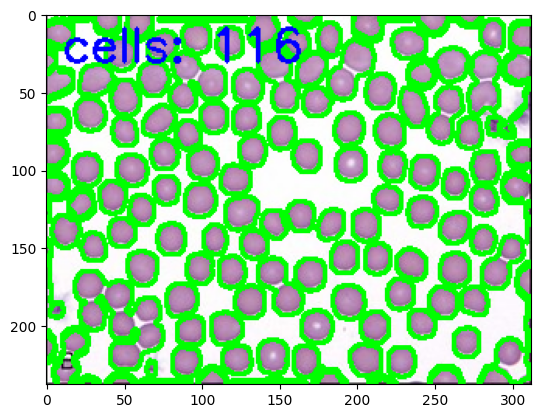

In [24]:
# Display the image

print("Cells in the image: ", len(contours))
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(colored_contours_img, 'cells: {}'.format(len(contours)), (10, 30), font, 1, (0, 0, 255), 2)
plt.imshow(colored_contours_img)
plt.show()